In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
dados = pd.read_csv('airline.txt', header=None)
dados.columns = ['passageiros']

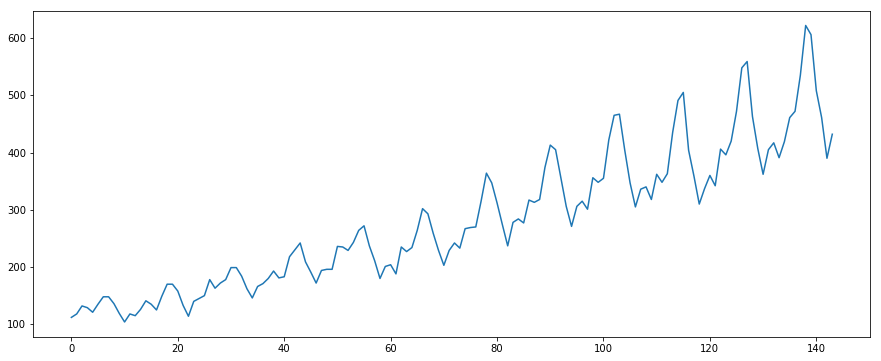

In [4]:
plt.plot(dados)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


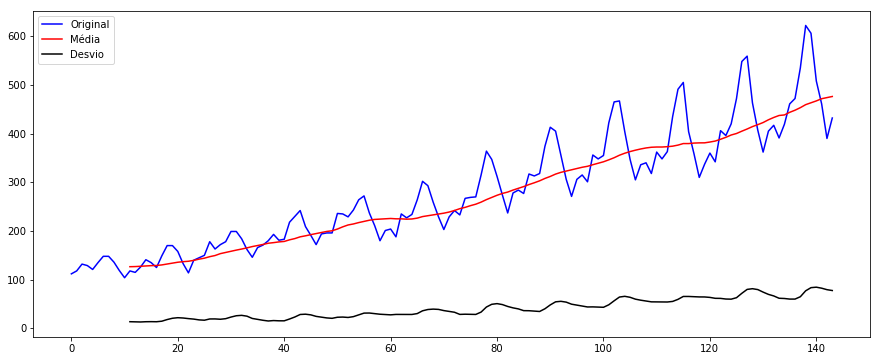

In [5]:
m_m = pd.rolling_mean(dados, window=12)
m_std = pd.rolling_std(dados, window=12)

orig = plt.plot(dados, color='blue',label='Original')
mean = plt.plot(m_m, color='red',label='Média')
std = plt.plot(m_std, color='black',label='Desvio')
plt.legend(loc='best')
plt.show()

### Estimativa e Eliminação da Tendência 

#### Média móveis

In [6]:
k = 12 # média de k 
media_mov = pd.rolling_mean(dados,k)  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  


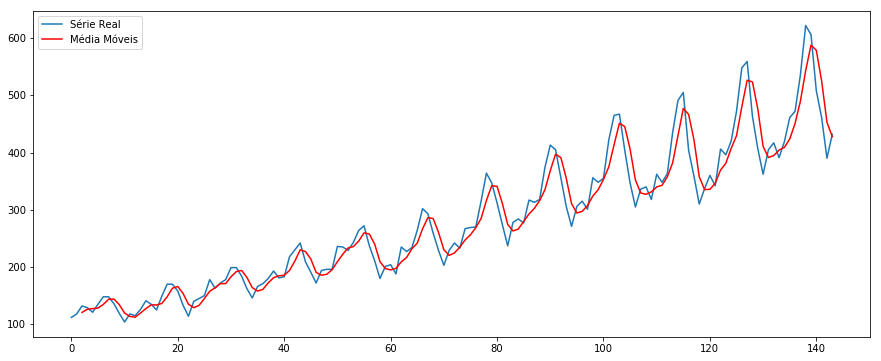

In [7]:
rolling = dados.rolling(window=3)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Suavização Exponencial 

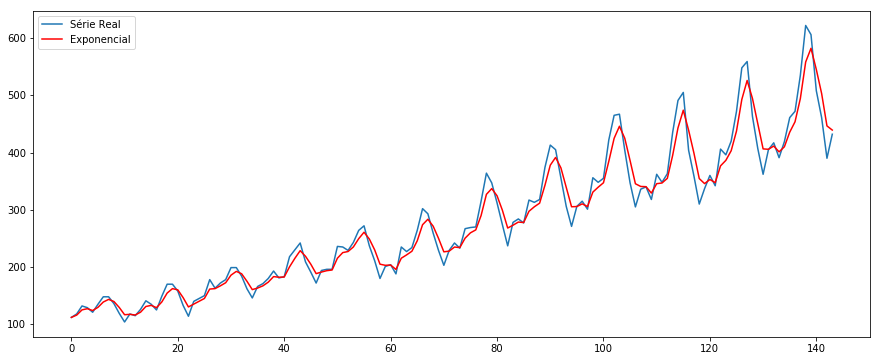

In [8]:
rolling =  dados.ewm(alpha =0.5)
rolling_mean = rolling.mean()
plt.plot(dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

In [9]:
rolling = dados.interpolate(method = 'polynomial', order=2)

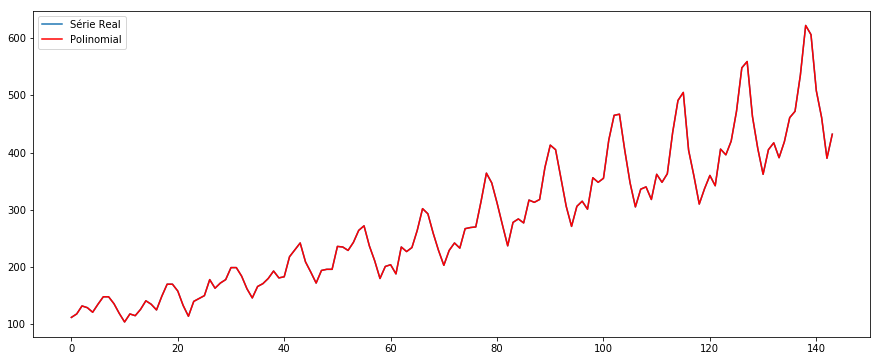

In [10]:
plt.plot(dados, label='Série Real')
plt.plot(rolling,color='red', label='Polinomial')
plt.legend(loc='best')
plt.show()

### Eliminando a tendência

In [11]:
dados_sazonalidade_ruido = dados - rolling_mean  # Série - componente de tendência

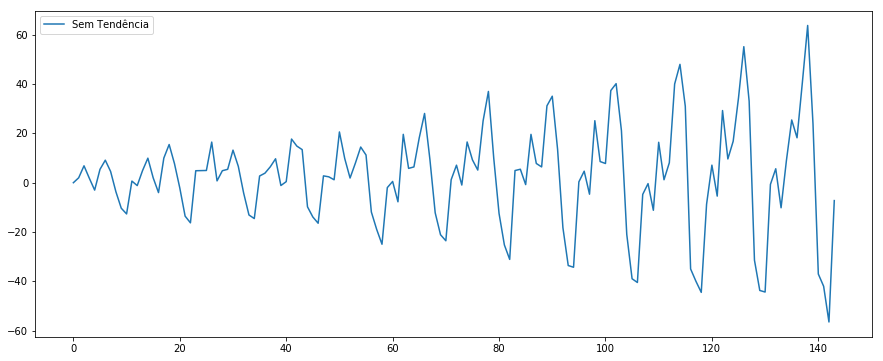

In [12]:
plt.plot(dados_sazonalidade_ruido, label='Sem Tendência')
plt.legend(loc='best')
plt.show()

### Eliminação de Tendência por Diferenciação

In [13]:
dados_diff = dados - dados.shift()  #Subtrai a série por ela mesma com um retardo -1

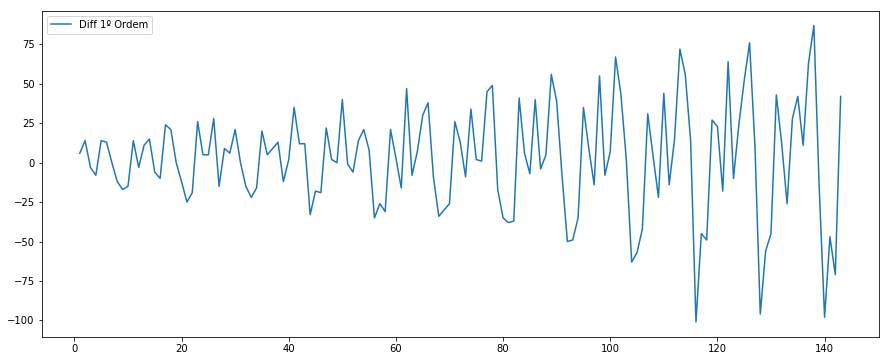

In [14]:
plt.plot(dados_diff, label='Diff 1º Ordem')
plt.legend(loc='best')
plt.show()

In [15]:
dados_diff_2 = dados_diff - dados_diff.shift()

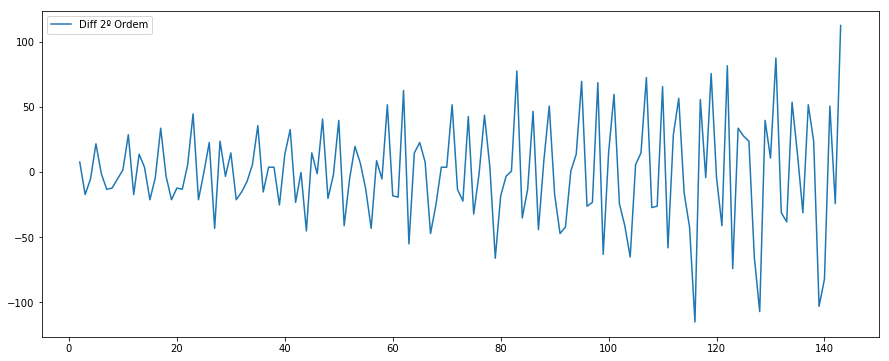

In [16]:
plt.plot(dados_diff_2, label='Diff 2º Ordem')
plt.legend(loc='best')
plt.show()

### Estimação e Eliminação da Sazonalidade

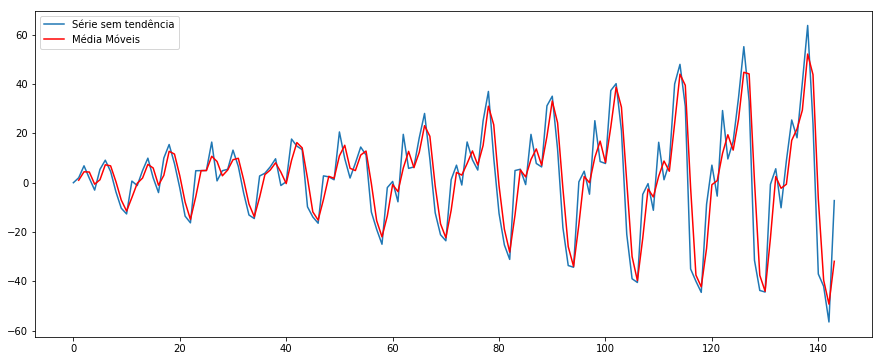

In [17]:
#Aplica média móveis na série sem a tendência 
dados_sazonalidade_ruido

rolling = dados_sazonalidade_ruido.rolling(window=2)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(dados_sazonalidade_ruido, label='Série sem tendência')
plt.plot(rolling_mean,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

In [18]:
dados_ruido = dados_sazonalidade_ruido - rolling_mean #Elimina o componente de sazonalidade 

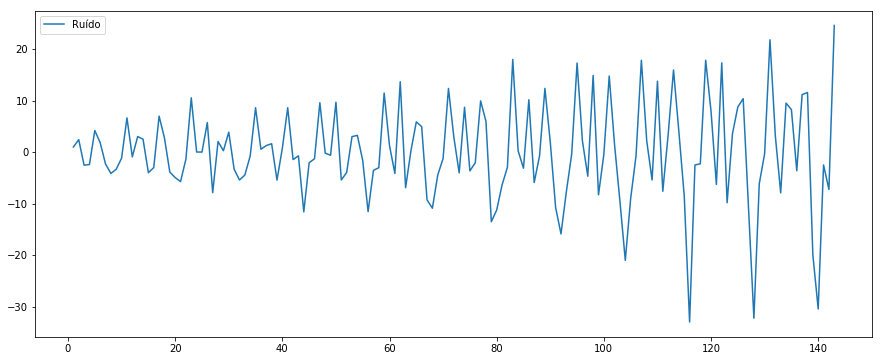

In [19]:
plt.plot(dados_ruido, label='Ruído')
plt.legend(loc='best')
plt.show()

### Avaliar o resíduo 

In [20]:
import statsmodels.tsa.api as smt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


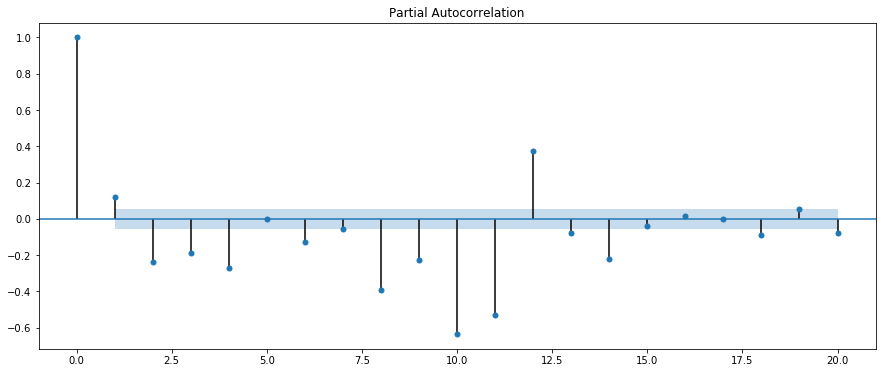

In [21]:
dados_ruido.dropna(inplace=True) # retira os NaN
smt.graphics.plot_pacf(dados_ruido, lags=20, alpha=0.5)
plt.show()

* __É possível observar que ainda existem lags que estão com correlação estatisticamente significante, ou seja, o residuo ainda não pode ser considerado I.I.D. Por conta disso, os modelos de tendência e sazonalidade precisam ser reajustados__ 

### Decomposição da série de forma automática 

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
#é preciso criar uma frequencia na série para usar a função de decomposição 
rng = pd.date_range('1949 Jan 1', periods = len(dados), freq = 'M')

In [24]:
dados_date = pd.Series(dados['passageiros'].values, index = rng)

In [25]:
decomp = seasonal_decompose(dados_date)

In [26]:
tendencia = decomp.trend
sazonalidade = decomp.seasonal
residuo = decomp.resid

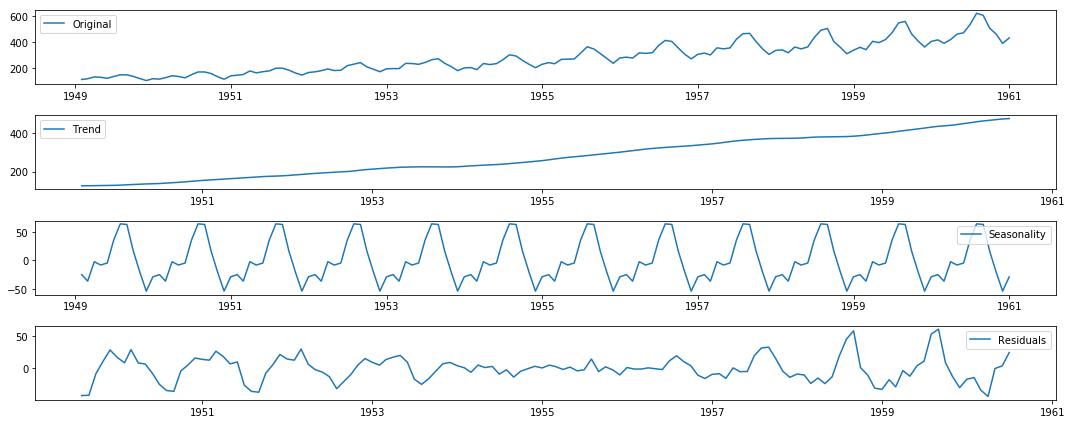

In [27]:
plt.subplot(411)
plt.plot(dados_date, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()